In [1]:
import warnings
warnings.filterwarnings('ignore')

# EECS 731 Final Project - Clothing One
## Anomaly Detection

In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
# We want to first drop unrealist data like age 0 and age 117

# Also drop age < 14 since rent the runway started renting child size clothes in April 2019 which means none of the clothes should be targeted toward children
#, age > 75 since this is not the target demographic that makes up the bulk of orders meaning the bulk of returns

### Ⅰ. Univariate
-- Rules Applied: 3σ rule and boxplot

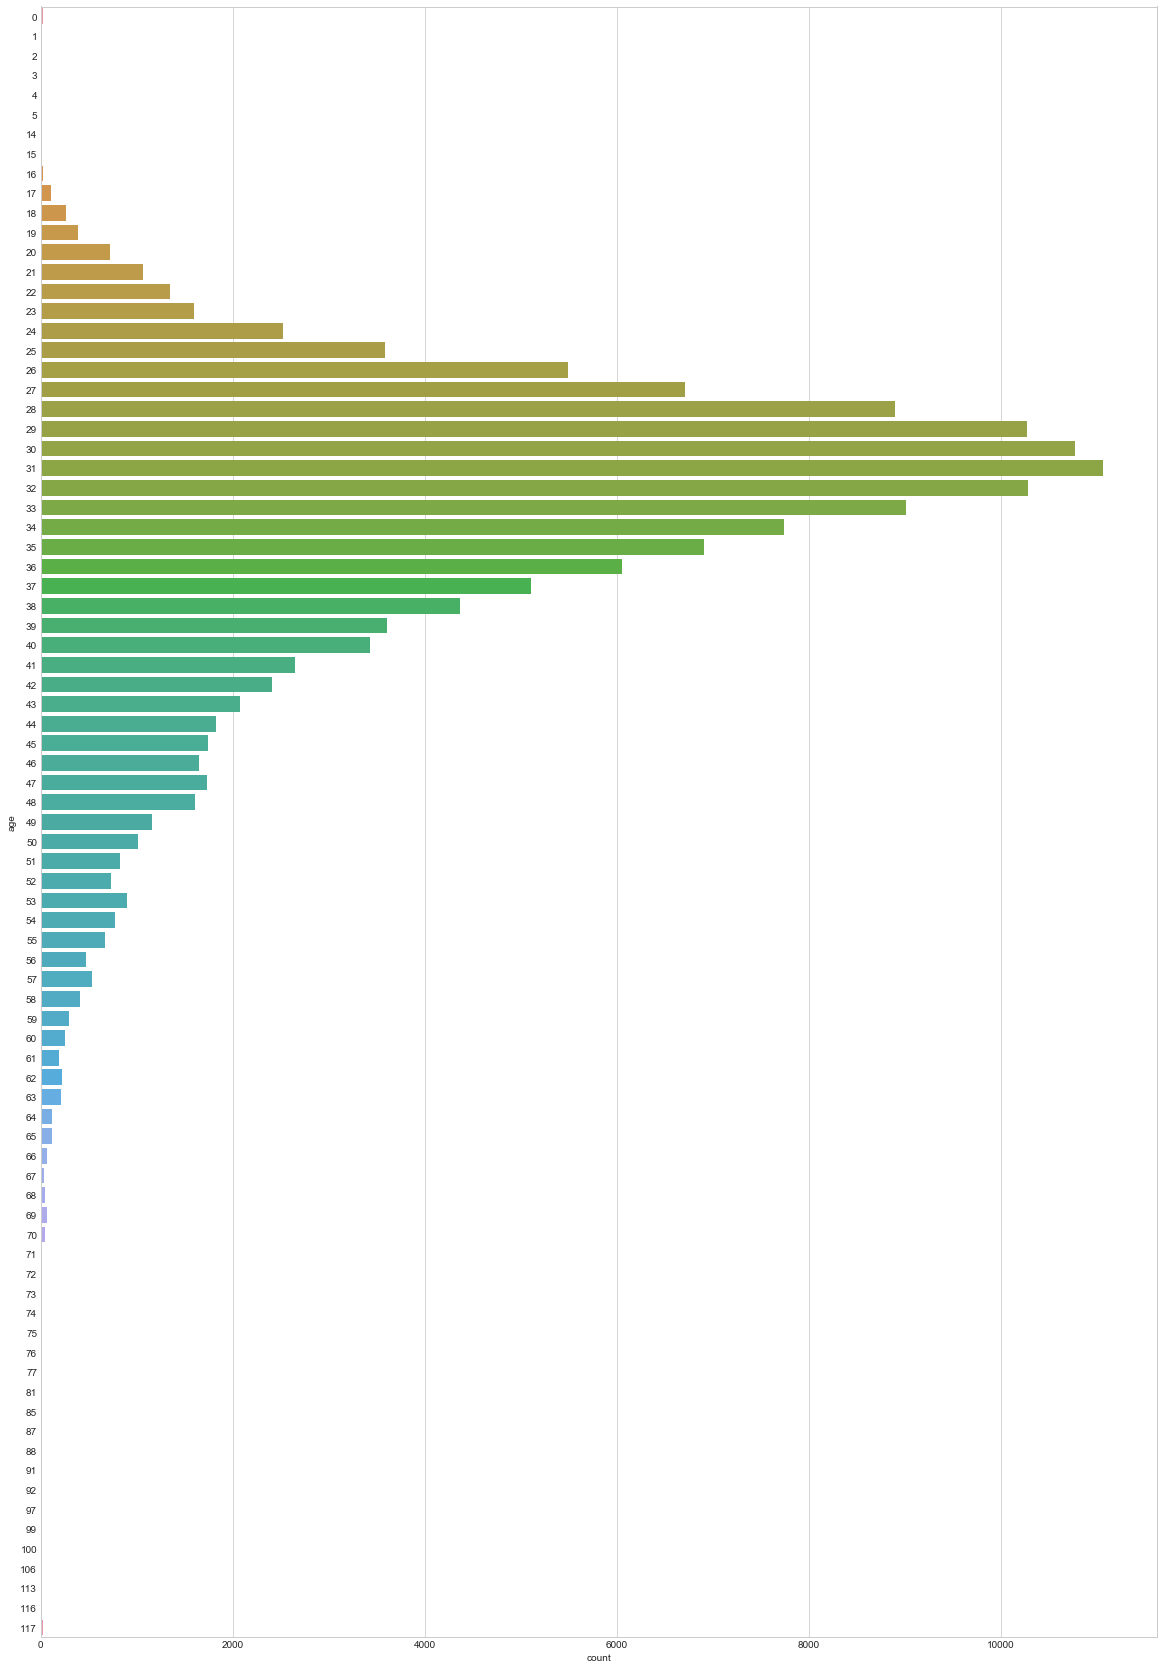

In [6]:
data_bin = pd.DataFrame()

data_bin['age'] = reviews['age']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 30)) 
sns.countplot(y = "age", data = data_bin);

In [7]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_age = three_sigma(reviews['age'])
print("Anomalies:")
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
data_anomaly_age = pd.DataFrame(data_anomaly_age).sort_values('age').reset_index().drop(['index'],axis=1)
data_anomaly_age

Anomalies:
Count:  1840
Min:  0
Max:  117


,age
0,0
1,0
2,0
3,0
4,0
...,...
1835,117
1836,117
1837,117
1838,117


In [8]:
# sns.barplot(data_anomaly_age.count_values());
data_age = pd.DataFrame(data_anomaly_age['age'].value_counts())
data_age['count'] = data_age['age']
data_age['age'] = data_age.index
data_age = data_age.sort_values('age')
data_age.set_index('age')

,count
age,
0,21
1,1
2,10
3,7
4,1
5,1
59,300
60,253
61,193


In [9]:
reviews_age60 = reviews.loc[reviews['age'] < 60]
data_anomaly_age = three_sigma(reviews_age60['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1290
Min:  0
Max:  59
Anomalies:


157       59
205       59
212       58
385       57
516       58
          ..
146033    58
146100    57
146192    57
146270    59
146284    57
Name: age, Length: 1290, dtype: int64

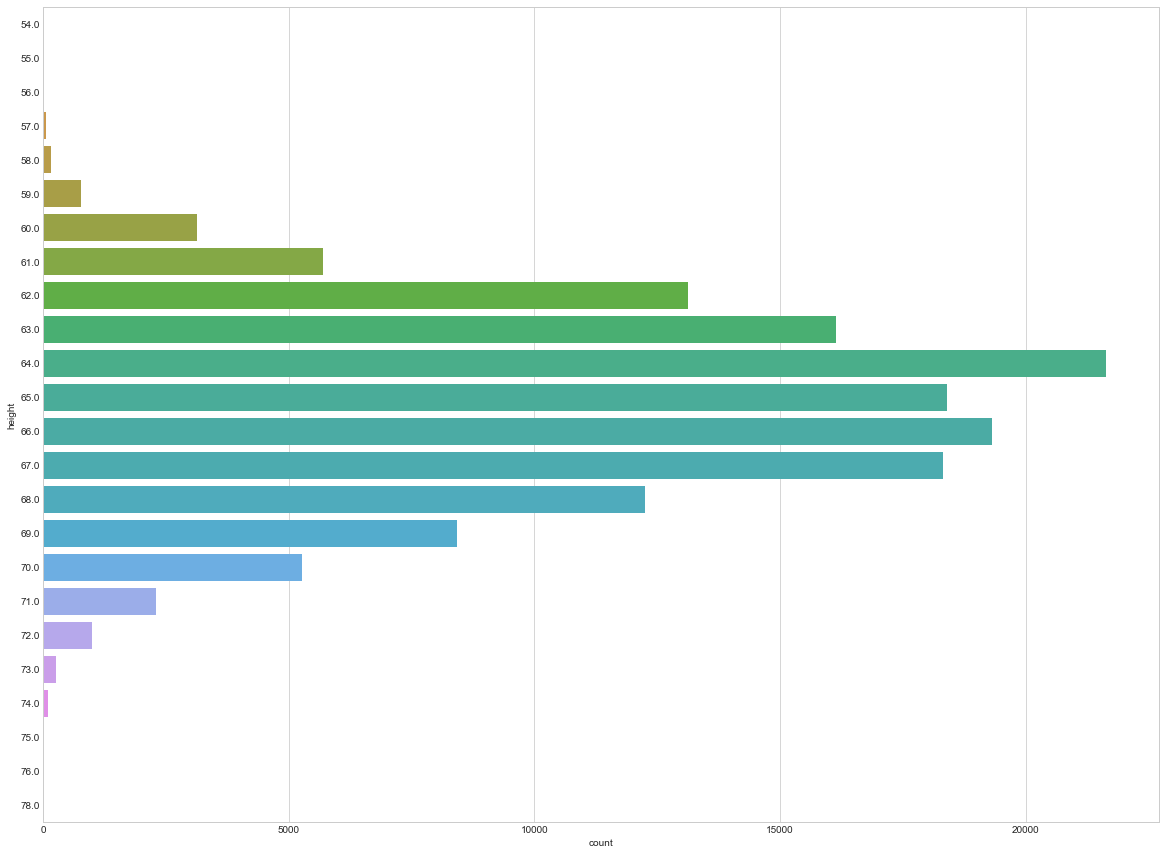

In [10]:
data_bin = pd.DataFrame()

data_bin['height'] = reviews['height']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 15)) 
sns.countplot(y = "height", data = data_bin);

In [11]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_height = three_sigma(reviews['height'])
print("Anomalies:")
print("Count:", data_anomaly_height.count())
print("Min: ", data_anomaly_height.min())
print("Max: ", data_anomaly_height.max())
anomaly_heights = pd.DataFrame(pd.DataFrame(data_anomaly_height).sort_values('height')['height'].value_counts(sort=False))
anomaly_heights = anomaly_heights.rename(columns={"height": "count"})
anomaly_heights['height'] = anomaly_heights.index
anomaly_heights.index = anomaly_heights['height']
anomaly_heights = anomaly_heights.drop(['height'], axis=1) 
anomaly_heights

Anomalies:
Count: 225
Min:  54.0
Max:  78.0


,count
height,
54.0,11
55.0,11
56.0,14
57.0,54
74.0,97
75.0,23
76.0,14
78.0,1


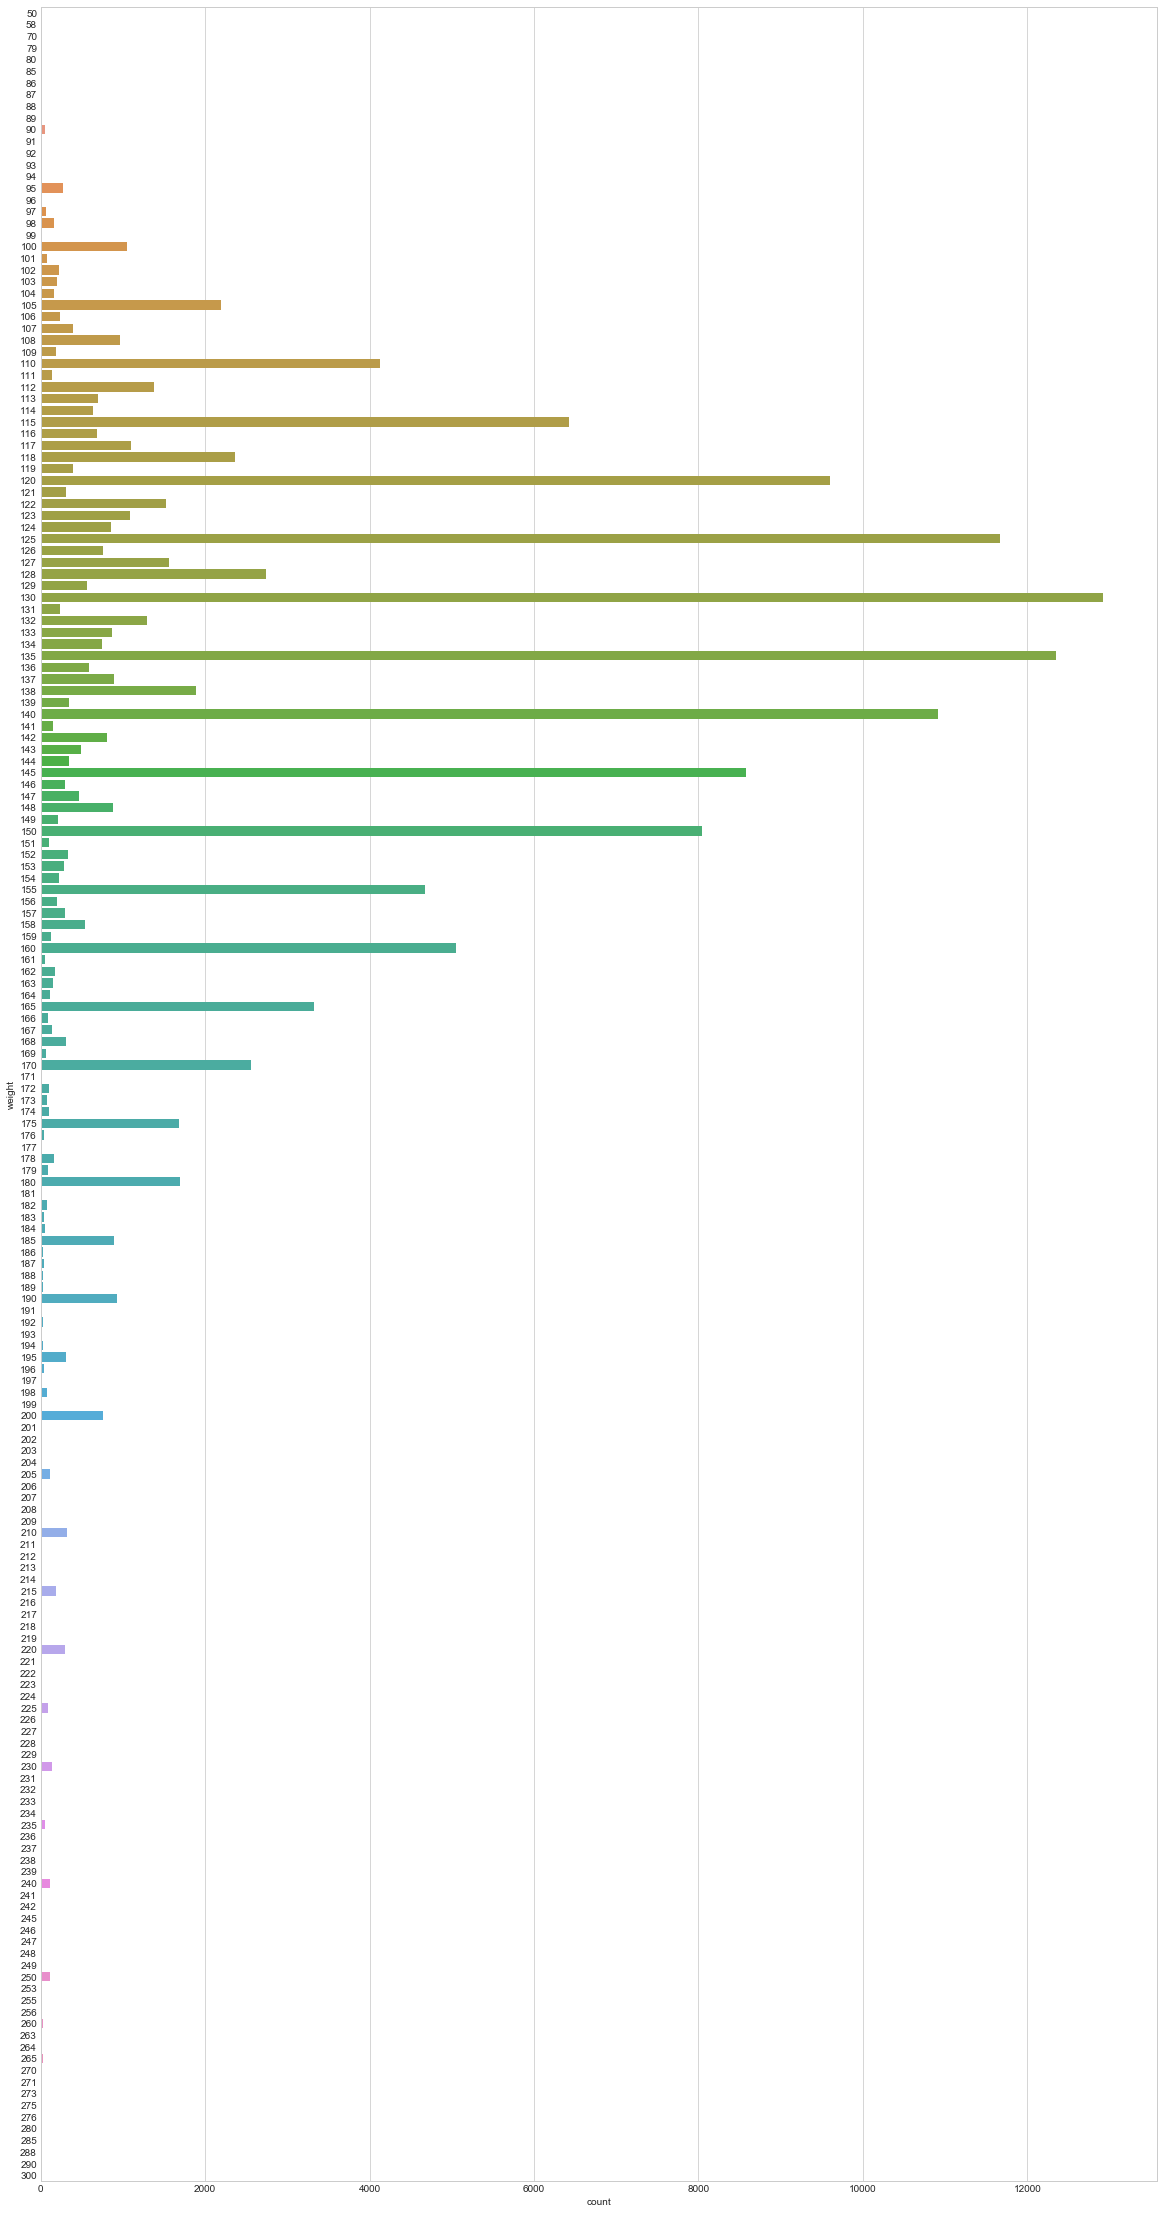

In [12]:
data_bin = pd.DataFrame()

data_bin['weight'] = reviews['weight']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 40)) 
sns.countplot(y = "weight", data = data_bin);

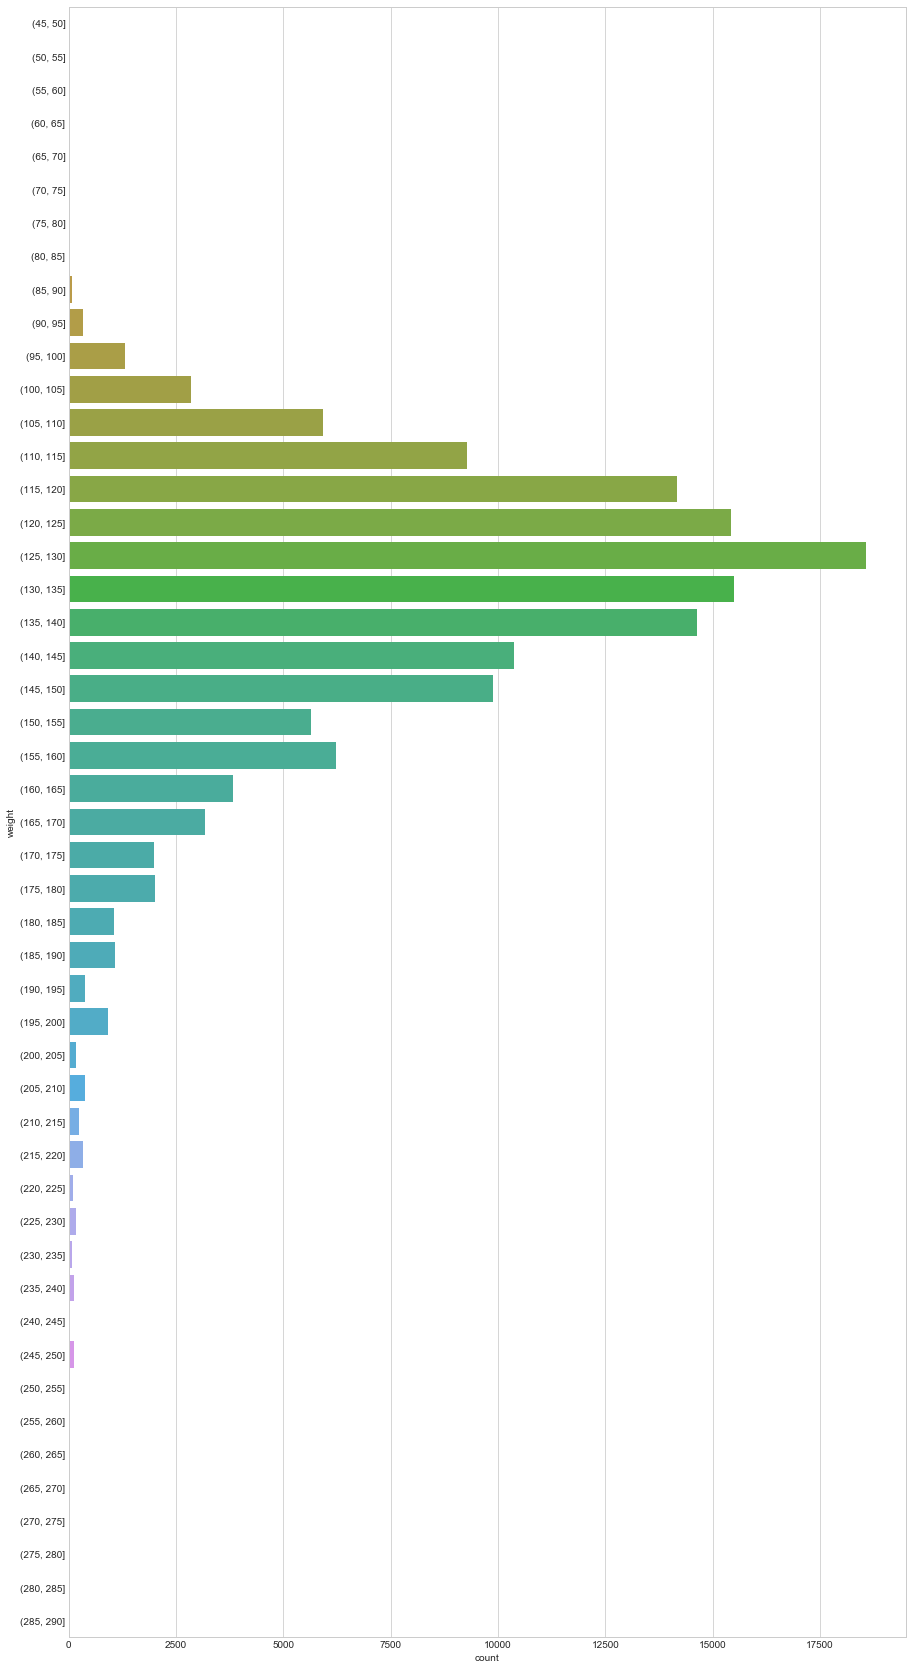

In [13]:
binned_weight = pd.DataFrame(pd.cut(reviews['weight'], pd.interval_range(start=45, end=290, freq=5)))
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (15, 30)) 
sns.countplot(y = 'weight', data =binned_weight);

In [14]:
bin_df = pd.DataFrame(binned_weight['weight'].apply(lambda x: x.right))['weight'].astype('int')
reviews['weight'] = bin_df
reviews.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,140,590,4
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,135,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,140,310,2


In [15]:
dfWeight = reviews

def three_sigmaWeight(Ser1):
    weight = reviews['weight']
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(weight.shape[0])[rule]
    outrange = weight.iloc[index]
    return outrange

data_anomaly_weight = three_sigma(dfWeight['weight'])
print("Anomalies:")
print("Count:", data_anomaly_weight.count())
print("Min: ", data_anomaly_weight.min())
print("Max: ", data_anomaly_weight.max())
pd.DataFrame(data_anomaly_weight).sort_values('weight').reset_index().drop(['index'],axis=1)

Anomalies:
Count: 2
Min:  -9223372036854775808
Max:  -9223372036854775808


,weight
0,-9223372036854775808
1,-9223372036854775808


Original Dataset Description: 
                 age
count  146381.000000
mean       34.089800
std         8.113217
min         0.000000
25%        29.000000
50%        32.000000
75%        37.000000
max       117.000000
Data set from observation Description: 
                 age
count  146165.000000
mean       34.043519
std         7.881440
min        16.000000
25%        29.000000
50%        32.000000
75%        37.000000
max        69.000000
Data set from boxplot Description: 
                 age
count  130159.000000
mean       31.989567
std         5.153699
min        18.000000
25%        28.000000
50%        32.000000
75%        35.000000
max        44.000000


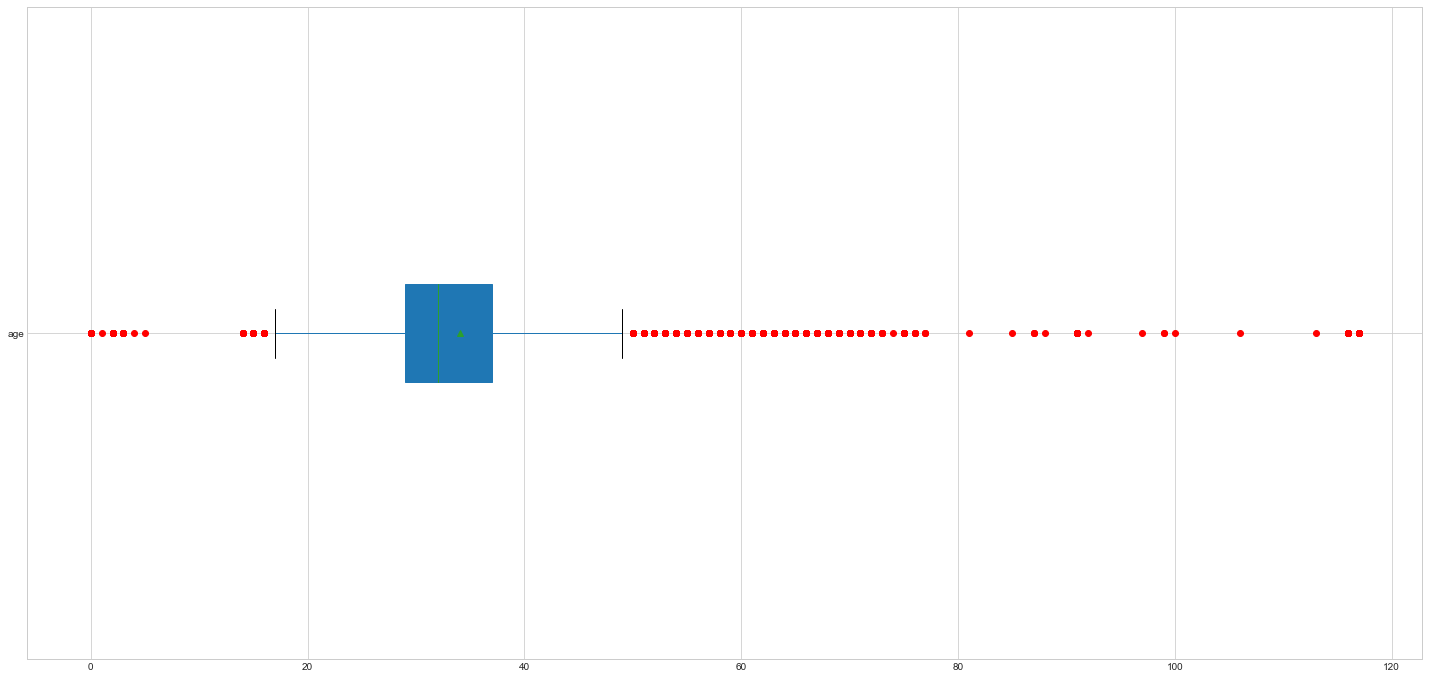

In [16]:
reviews_age = reviews[['age']]

statistics_origin = reviews_age.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_age.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_age[(reviews['age'] > 15)&(reviews['age'] < 70)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_age[(reviews['age'] > 17)&(reviews['age'] < 45)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
              height
count  146381.000000
mean       65.263053
std         2.659230
min        54.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        78.000000
Data set from observation Description: 
              height
count  146307.000000
mean       65.262913
std         2.649975
min        57.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        74.000000
Data set from boxplot Description: 
              height
count  146210.000000
mean       65.257116
std         2.641278
min        57.000000
25%        63.000000
50%        65.000000
75%        67.000000
max        73.000000


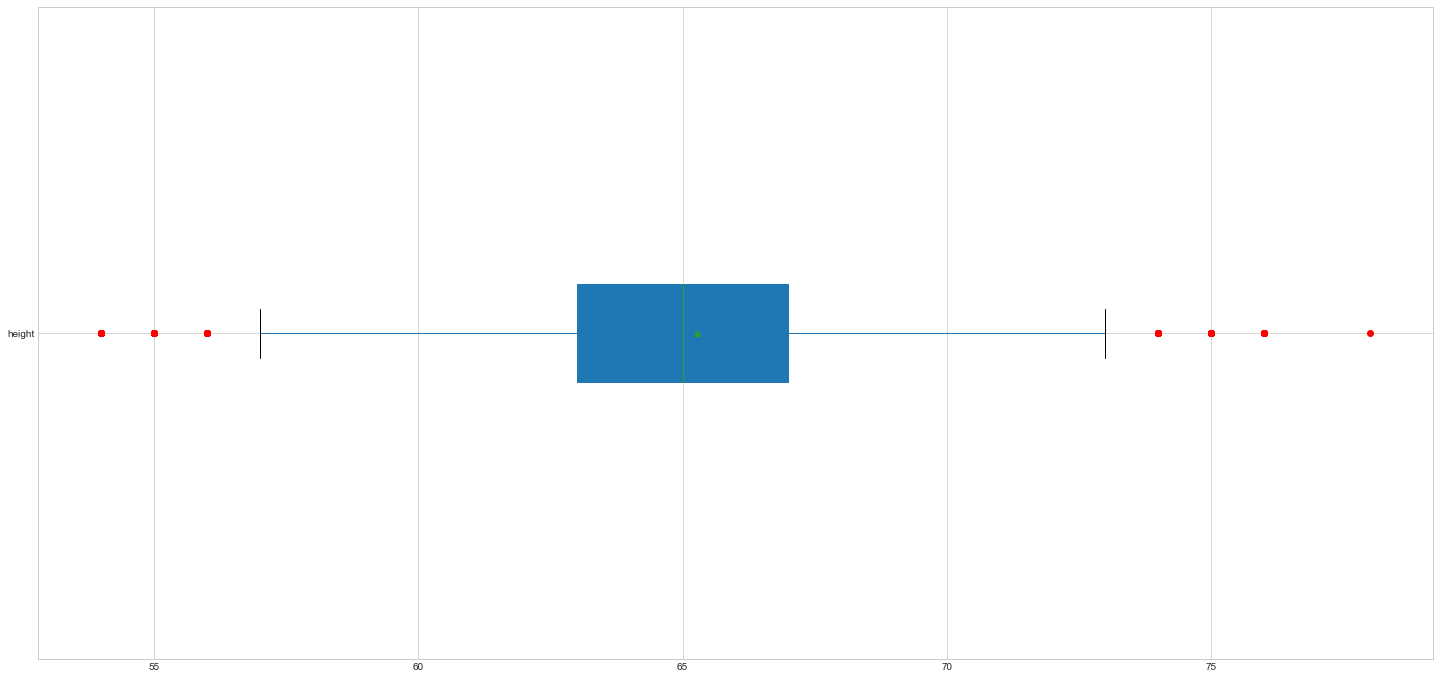

In [17]:
reviews_height = reviews[['height']]

statistics_origin = reviews_height.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_height.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 75)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 74)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
             weight
count  1.463810e+05
mean  -1.260187e+14
std    3.409266e+16
min   -9.223372e+18
25%    1.250000e+02
50%    1.350000e+02
75%    1.500000e+02
max    2.900000e+02
Data set from observation Description: 
              weight
count  146055.000000
mean      137.602376
std        20.808254
min        95.000000
25%       125.000000
50%       135.000000
75%       150.000000
max       245.000000
Data set from boxplot Description: 
              weight
count  141089.000000
mean      135.342904
std        17.193969
min        90.000000
25%       125.000000
50%       135.000000
75%       145.000000
max       180.000000


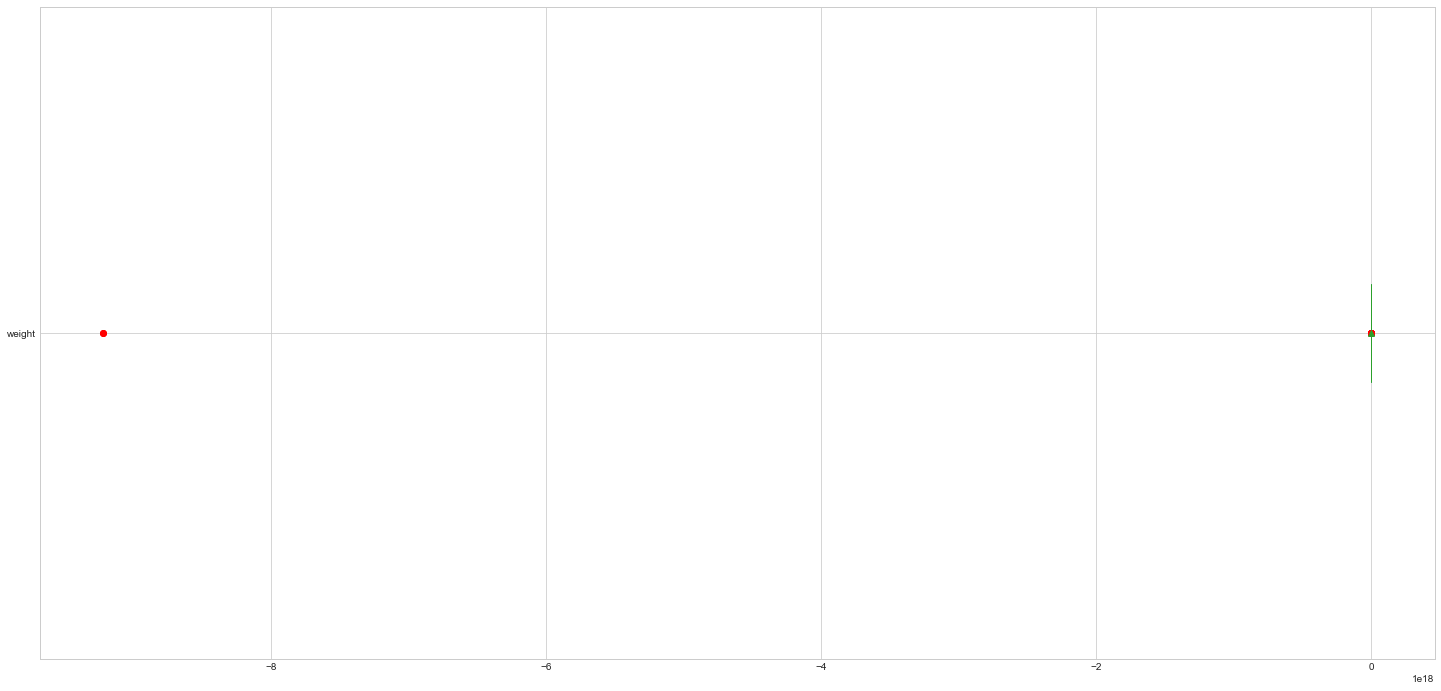

In [18]:
reviews_weight = reviews[['weight']]

statistics_origin = reviews_weight.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_weight.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_weight[(reviews['weight'] > 94)&(reviews['weight'] < 250)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_weight[(reviews['weight'] > 85)&(reviews['weight'] < 185)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

#### Conclusion
- Applying boxplot would reject more data points than the 3σ rule would do. 
- Boxplot is highly symmetric for the graph of "height", which once again could be the result of "height" being normally distributed.
- There are two ways to interpret the data: 
    - The first one could be catagorized as "fake data", which could tell by obsserving the dataset.This type of data is semantically meaningless. Data points such as age of 0 and age of 117 falls into this catagory.
    - The second one could be catagorized as "scarce data". They happen at a less frequency when compared to other data and is thus rejected by the algorithms. This type of data is less helpful when applying machine learning. Data points such as height of 78 inch and 54 inch would fall into this category.
- It leaves up to the data interpreter to decide how they want to look at the data
    

In [19]:
old_size = len(reviews)
reviews
#static rule age to drop age less than 13 or greater than 80
reviews = reviews.loc[reviews['age'].apply(lambda a :a > 12 and a <= 80)]
number_removed = old_size - len(reviews)
number_removed

111

In [20]:
old_size = len(reviews)
#static rule remove all products with less than 50 reviews
itemCounts = reviews['item_id'].value_counts()
reviews = reviews.loc[reviews['item_id'].apply(lambda p : itemCounts[p] >= 100)]
number_removed = old_size - len(reviews)
number_removed

91540

In [21]:
itemCounts.head()

126335    1526
123793    1354
174086    1273
127865    1115
145906    1110
Name: item_id, dtype: int64

### Ⅱ. Multivariate
- Algorithm applied: Isolation forest

In [22]:
from sklearn.ensemble import IsolationForest

In [23]:
rng = np.random.RandomState(42)
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.0003
                      
    )
X_cols = ["category","rented_for"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews.copy()
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,pred
12190,30,3,52,fit,68.0,2565135,8,0,2015-03-04,8,813562,125,390,3,-1
26603,31,1,52,fit,69.0,2565135,10,0,2014-07-02,8,863502,130,480,2,-1
30730,36,1,52,fit,69.0,2565135,8,0,2015-03-25,8,451377,135,590,4,-1
43516,35,1,52,small,64.0,2565135,8,0,2014-11-05,4,562734,125,390,3,-1
53691,44,3,52,fit,61.0,2565135,8,0,2015-03-22,4,711580,105,310,1,-1
54348,35,5,52,fit,60.0,2565135,10,0,2015-05-11,4,320152,110,390,3,-1
69650,24,3,52,small,66.0,2565135,10,0,2014-04-07,8,579087,130,480,4,-1
79145,29,1,52,fit,62.0,2565135,6,0,2014-10-14,4,896370,125,480,3,-1
124843,32,1,52,fit,68.0,2565135,8,0,2015-10-01,8,218394,130,390,2,-1
134071,32,1,52,large,64.0,2565135,8,0,2017-06-21,4,464447,115,310,1,-1


In [24]:
X_cols = ["height","weight","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews.copy()
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,pred
30021,27,3,16,small,63.0,136110,10,7,2014-08-24,57,980712,250,850,4,-1
33123,25,4,20,small,68.0,125564,8,2,2016-08-10,57,309472,260,850,4,-1
37011,33,4,20,fit,72.0,142179,10,7,2017-03-27,44,482373,250,850,4,-1
53400,25,0,16,fit,71.0,1920477,8,2,2015-04-09,51,596569,250,710,4,-1
62129,35,4,20,small,67.0,132738,6,2,2015-01-29,57,714900,260,590,2,-1
62984,28,0,16,fit,60.0,467817,8,7,2017-09-05,51,383515,250,1180,6,-1
83647,56,4,20,fit,63.0,125465,10,4,2014-09-20,57,890133,250,850,4,-1
83662,30,3,16,fit,71.0,126335,8,2,2015-02-26,51,282132,250,1000,5,-1
93726,32,4,45,fit,72.0,1695279,10,3,2014-07-11,39,434010,250,590,3,-1
98554,35,4,16,small,67.0,126335,10,2,2015-01-12,57,714900,260,590,2,-1


In [25]:
X_cols = ["bust_volume","chest_diff","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews.copy()
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,pred
2856,28,2,20,fit,64.0,1241304,10,3,2017-06-08,51,193803,270,1370,6,-1
8531,39,3,20,fit,65.0,1501987,10,2,2017-11-21,57,585229,280,1810,6,-1
11460,31,2,16,fit,62.0,1800440,10,6,2017-09-25,45,33878,230,1370,6,-1
17239,33,0,20,fit,64.0,1446293,8,7,2016-04-23,51,931022,220,1580,6,-1
37593,39,0,16,large,61.0,833666,10,7,2017-10-11,45,801249,240,1370,6,-1
40174,28,2,16,fit,67.0,130259,10,4,2017-11-27,45,832890,240,1580,8,-1
46874,35,3,20,fit,68.0,125465,10,2,2014-10-03,51,199631,210,1810,7,-1
53401,36,2,16,small,65.0,1515649,8,4,2018-01-02,54,543250,265,1810,6,-1
61801,32,2,20,small,64.0,125564,8,1,2017-11-04,45,146707,220,1370,7,-1
64885,33,2,20,fit,64.0,1241304,8,2,2016-11-07,45,882860,230,1580,8,-1


In [26]:
reviews.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,135,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
6,65,2,16,fit,63.0,130259,10,2,2013-01-01,8,86661,120,710,5
7,33,5,20,fit,63.0,1729232,10,2,2016-10-17,1,154309,115,310,2
9,30,4,16,large,66.0,130259,8,7,2013-01-07,8,533900,135,390,2


In [27]:
X_cols = [ "weight", "size", 'height', 'bust_volume', 'chest_diff']

item_id = 126335
largest_item = reviews.loc[reviews['item_id'] == item_id]
fit_data = largest_item.loc[largest_item['fit'] == 'fit']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fit_data[X_cols] = scaler.fit_transform(fit_data[X_cols])

ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.05
                      
    )
fit_data['Anomaly'] = ilf.fit_predict(fit_data[X_cols])

reviews_tested = largest_item.loc[largest_item['fit'] == 'fit']
reviews_tested['Anomaly'] = fit_data['Anomaly']

size_28 = reviews_tested.loc[reviews_tested['size'] == 28].sort_values('weight').reset_index().drop(['index'], axis=1)
size_28.head(30)

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,Anomaly
0,46,3,16,fit,68.0,126335,10,7,2014-11-21,28,780135,125,590,4,1
1,26,3,16,fit,68.0,126335,10,2,2014-12-15,28,894230,140,590,4,1
2,36,4,16,fit,63.0,126335,8,7,2014-05-08,28,812257,140,390,2,1
3,62,0,16,fit,66.0,126335,8,2,2016-04-22,28,63419,150,850,4,1
4,49,3,16,fit,67.0,126335,10,4,2012-12-16,28,770657,155,710,3,1
5,30,4,16,fit,65.0,126335,10,7,2014-07-28,28,348374,155,590,3,1
6,30,4,16,fit,69.0,126335,10,7,2016-06-01,28,144763,160,710,4,1
7,29,4,16,fit,67.0,126335,8,7,2014-08-04,28,814048,160,590,4,1
8,33,2,16,fit,69.0,126335,10,4,2014-11-12,28,936262,165,850,5,1
9,41,2,16,fit,59.0,126335,10,4,2014-12-15,28,961424,165,710,3,1


In [28]:
def convertAnomaly(s):
    if s == 1:
        return "Good"
    return "Anomaly"

size_28['Anomaly'] = size_28.Anomaly.apply(convertAnomaly)
size_28.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,Anomaly
0,46,3,16,fit,68.0,126335,10,7,2014-11-21,28,780135,125,590,4,Good
1,26,3,16,fit,68.0,126335,10,2,2014-12-15,28,894230,140,590,4,Good
2,36,4,16,fit,63.0,126335,8,7,2014-05-08,28,812257,140,390,2,Good
3,62,0,16,fit,66.0,126335,8,2,2016-04-22,28,63419,150,850,4,Good
4,49,3,16,fit,67.0,126335,10,4,2012-12-16,28,770657,155,710,3,Good


In [29]:
size_28.sort_values(['weight'])

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,Anomaly
0,46,3,16,fit,68.0,126335,10,7,2014-11-21,28,780135,125,590,4,Good
1,26,3,16,fit,68.0,126335,10,2,2014-12-15,28,894230,140,590,4,Good
2,36,4,16,fit,63.0,126335,8,7,2014-05-08,28,812257,140,390,2,Good
3,62,0,16,fit,66.0,126335,8,2,2016-04-22,28,63419,150,850,4,Good
4,49,3,16,fit,67.0,126335,10,4,2012-12-16,28,770657,155,710,3,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,29,4,16,fit,67.0,126335,10,3,2014-03-24,28,920231,220,710,3,Good
77,34,3,16,fit,68.0,126335,10,2,2013-05-09,28,469806,220,710,3,Good
78,31,2,16,fit,67.0,126335,10,3,2013-08-01,28,611907,220,1000,5,Anomaly
79,31,4,16,fit,70.0,126335,10,7,2015-05-26,28,173980,220,850,5,Anomaly


In [30]:
X_cols.remove('size')

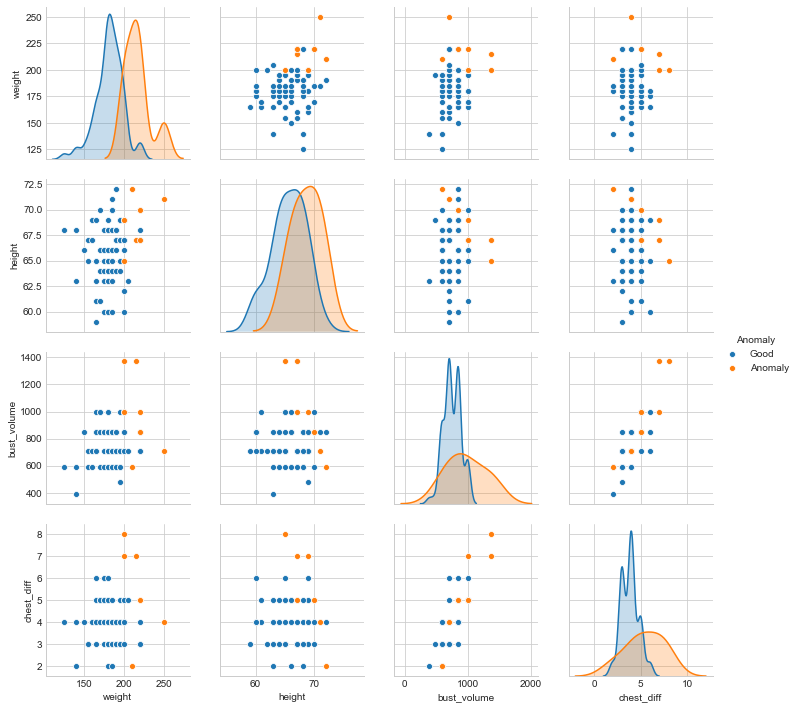

In [31]:
sns.pairplot(size_28, hue='Anomaly', vars=X_cols)

In [32]:
# from sklearn import preprocessing
# le_category = preprocessing.LabelEncoder()
# reviews['fit']  = le_category.fit_transform(reviews['fit'])
# le_category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
# category_encoding = pd.DataFrame.from_dict(le_category_mapping, orient='index').rename(columns={0: 'encoding'})
# category_encoding.index.name = 'labels'
# category_encoding.head()

In [33]:
# X_cols = ["fit", "weight", "size"]
# ilf.fit(reviews[X_cols])
# pred = ilf.predict(reviews[X_cols])
 
# data_pred = reviews
# data_pred["pred"] = pred

# data_pred.loc[data_pred["pred"] == -1]

#### Conclusion
- The contamination I picked is 0.003, which rejects about 0.3% of the data.
- Considering the rationale behind the Isolation Forest, the data it produced would fall into "scarce data". In this case, since the rejection rate is low, only the data that happen at very loe frequency would be rejected. 
- For example, the conbination of a person that weighs 250 lbs and ordered a size 51 dress would be rejected. 
- It is hard to tell that the data is rejected because the low frequency of a person weighing 250 lbs or the person weighing 250 lbs should have ordered a different size, considering the isolation forest will reject anything that happens less frequently.

In [34]:
itemSet = set(reviews.item_id)
print(len(itemSet))

233


In [35]:
X_cols = ['age', "weight", "size", 'height', 'bust_volume', 'chest_diff']
filtered = pd.DataFrame(reviews.fit != 'fit')

filtered = filtered[filtered['fit']==True]
filtered['fit'] = 1

fit_data = reviews.loc[reviews['fit'] == 'fit']
count = 0
anomalies = pd.DataFrame()
for item in itemSet:
    isolation_forest = IsolationForest(n_estimators = 100,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.1,
                      n_jobs=-1

    )
    product_reviews = fit_data.loc[fit_data['item_id'] == item]
#     if len(product_reviews) < 100:
#         pred = product_reviews.index.map(lambda x: 1)
#         df_pred = pd.DataFrame(pred)
#         df_pred.index = product_reviews.index
#         anomalies = pd.concat([anomalies, df_pred])
#         continue
    pred = isolation_forest.fit_predict(product_reviews[X_cols])
    df_pred = pd.DataFrame(pred)
    df_pred.index = product_reviews.index
    anomalies = pd.concat([anomalies, df_pred])
    count = count + 1
    if(count % 100 == 0):
        print(count)
print("Number of anomalies: ")
print(len(anomalies.loc[anomalies[0] == -1]))

anomalies = pd.concat([anomalies[0], filtered['fit']])
reviews['Anomaly'] = anomalies

100
200
Number of anomalies: 
4241


In [36]:
len(anomalies)

54730

In [37]:
len(reviews)

54730

In [38]:
copy = reviews.copy()
print(reviews.head())
copy['Anomaly'] =copy['Anomaly'].apply(lambda x: False if x==1 else True)
print(len(copy))
copy= copy[copy['Anomaly'] == False]
print(len(copy))

copy = copy.drop(columns=['Anomaly'])

   age  body_type  category    fit  height  item_id  rating  rented_for  \
1   36          6        20    fit    66.0   153475      10           3   
2   34          4        16    fit    65.0   126335       8           2   
6   65          2        16    fit    63.0   130259      10           2   
7   33          5        20    fit    63.0  1729232      10           2   
9   30          4        16  large    66.0   130259       8           7   

  review_date  size  user_id  weight  bust_volume  chest_diff  Anomaly  
1  2013-06-18    12   273551     135          390           2        1  
2  2014-02-12     8   909926     135          480           3        1  
6  2013-01-01     8    86661     120          710           5       -1  
7  2016-10-17     1   154309     115          310           2        1  
9  2013-01-07     8   533900     135          390           2        1  
54730
50489


In [39]:
copy.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,135,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
7,33,5,20,fit,63.0,1729232,10,2,2016-10-17,1,154309,115,310,2
9,30,4,16,large,66.0,130259,8,7,2013-01-07,8,533900,135,390,2
10,26,6,45,fit,66.0,1295171,10,4,2016-07-28,8,87660,120,390,1


In [40]:
len(copy)

50489

In [41]:
pickle.dump(copy, open( "../Data/reviews_anomalies_removed.pkl", "wb" ))